In [78]:
import numpy as np
import matplotlib.pyplot as plt
import vegas
import math
import scipy as scp
from scipy.integrate import simps
plt.rcParams['figure.figsize']=[10, 8]

# Direct Integration

In [14]:
def sim(X):
    m = 1
    a = 1/2
    N = 8
    lim = 5
    def V(x): return x**2 / 2
    def S(x):
        s = 0

        for j in range (0, N-2):
            s += m/(2*a) * (x[j+1] - x[j])**2 + a * V(x[j])   
        s = s + m/(2*a) * (x[0] - X)**2 + a * V(X)
        s = s + m/(2*a) * (X - x[N-2])**2 + a * V(x[N-2])
        return np.exp(-s)

    integ = vegas.Integrator([[-lim, lim],[-lim, lim], [-lim, lim], [-lim, lim], [-lim, lim], [-lim, lim], [-lim, lim]])
    result = integ(S, nitn=10, neval=100000)
    
    return result    

In [29]:
X = np.linspace(-3, 3, 20)
Val = []
Prop = []

for i in X:
    result = sim(i)
    Prop.append(result)
    print(result)
    Val.append(i)   

0.0010149(29)
0.006016(17)
0.029529(81)
0.11782(33)
0.3870(11)
1.0410(28)
2.2795(62)
4.127(11)
6.169(17)
7.530(20)
7.514(20)
6.155(16)
4.124(11)
2.2954(61)
1.0429(29)
0.3827(11)
0.11606(33)
0.029299(82)
0.006048(16)
0.0010139(29)


## The propagator

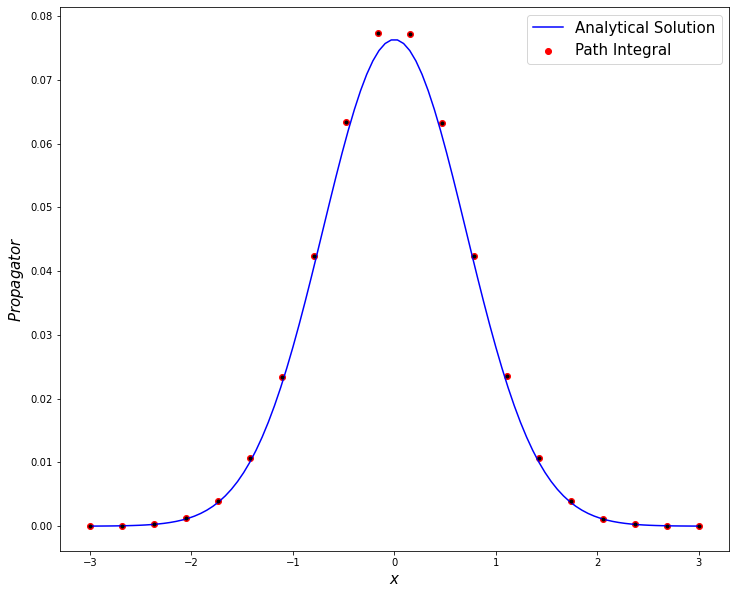

In [38]:
# The propagator
y =[]
for i in range(len(Prop)):
    y.append(Prop[i].mean)
m = 1
a = 1/2
N = 8    
T = 4
A = (m/(2*np.pi*a))**(N/2)

y = np.array(y)
plt.scatter(Val, A*y, label = "Path Integral", color = "red")

# Exact
X = np.linspace(-3, 3, 100)
exact = ( np.exp(-X**2 /2)/(np.pi**(1/4)) )**2 * np.exp(- 0.5*T)
plt.plot(X, exact, color = 'blue', label = "Analytical Solution")

# Labels
plt.xlabel("$x$", fontsize = '15')
plt.ylabel("$Propagator$", fontsize = '15')
plt.legend(fontsize = '15')
plt.errorbar(Val, A*y, yerr= A*y/np.sqrt(100000), fmt=".k")
plt.show()

## Ground State Energy

In [35]:
# Ground State Energy
X = np.linspace(-3, 3, 20)
I = simps(y, X)
E0 = np.log(I)/T
print("The Ground State Energy is", E0)

The Ground State Energy is 0.6541879061704265


## Ground State Wavefunction

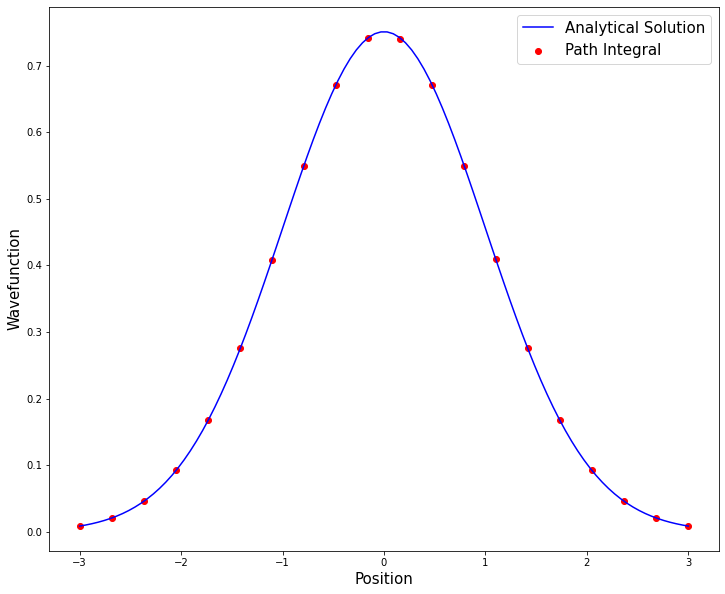

In [36]:
# Ground State Wavefunction
wavefunc = np.sqrt(y/I)
plt.scatter(X, wavefunc, color = 'red', label = "Path Integral")

# Exact
X = np.linspace(-3, 3, 100)
exact = np.exp(-X**2 /2)/(np.pi**(1/4)) 
plt.plot(X, exact, color = 'blue',label = "Analytical Solution")

#plt.title("The Ground State Wavefunction", fontsize = '15')
plt.xlabel("Position", fontsize = '15')
plt.ylabel("Wavefunction", fontsize = '15')
plt.legend(fontsize = '15')
plt.show()

# Markov Chain Monte Carlo (MCMC)
## Quantum Harmonic Oscillator

In [90]:
# Defining functions for our simulation

# Compute local Action

def S(j, x):
    jp = (j+1)%N
    jm = (j-1)%N
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

#===================================================
# To create a set of all possible paths with induced
# favoring for low action paths with a specific probability

def update(x):
    for j in range(0, N):
        old_x = x[j]                               # Saving original value
        old_Sj = S(j, x)       
        x[j] = x[j] + np.random.uniform(-eps, eps) #update
        
        dS = S(j, x) -old_Sj                       #minimize action
        if dS>0 and np.exp(-dS)<np.random.rand():
            x[j] = old_x
    return x

### Ground State Wavefunction

In [91]:
# Computing the object of interest

def compute_G(x,n):
    
    s = 0

    for j in range (0, N-2):
        s += m/(2*a) * (x[j+1] - x[j])**2 + a * V(x[j])   
    s = s + m/(2*a) * (x[0] - X)**2 + a * V(X)
    s = s + m/(2*a) * (X - x[N-2])**2 + a * V(x[N-2])
    return np.exp(-s)

In [92]:
# Simulation function

m =1
N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.9                                            # time step/Lattice spacing
N_corr =  20                                      # Correlation damping measure
N_cf = 5000                                       # Total Paths used

#=============================================
# Call Simulation

Yo=np.linspace(-3, 3, 10)
Prop = []
for X in Yo:
    G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                     # the computed G for each path at
                                                     # each lattice point

    timestep, estimator = MCaverage(G)               # Simulate
    Prop.append(np.mean(estimator))
    print(np.mean(estimator))
I = simps(Prop, Yo)
Prop = np.array(Prop)
Wv= np.sqrt(Prop/I)
print(Wv)

1.2617530441300301e-08
1.2777416050488767e-06
3.5735386758698577e-05
0.000340418783967139
0.0009922651448239948
0.0010373765134719475
0.00032845216214397443
3.833832719988995e-05
9.857576791133693e-07
9.966578602345486e-09
[0.00261155 0.0262804  0.13898234 0.42896035 0.7323594  0.748822
 0.42135335 0.14395507 0.02308317 0.00232104]


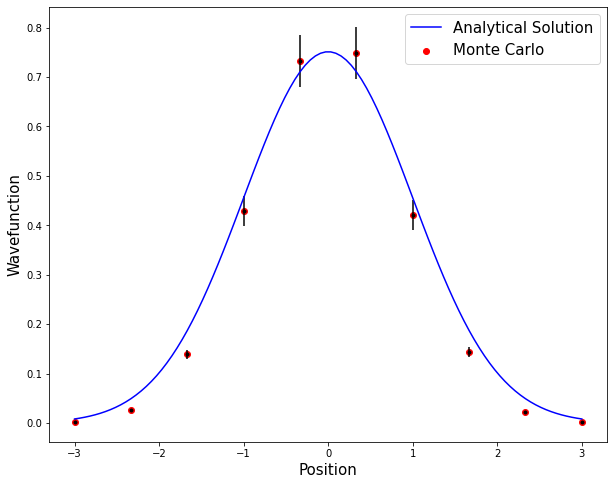

In [94]:
#Plotting
plt.rcParams['figure.figsize']=[10, 8]
plt.scatter(Yo, Wv, color = 'red',label = "Monte Carlo")

# Exact
X = np.linspace(-3, 3, 100)
exact = np.exp(-X**2 /2)/(np.pi**(1/4)) 
plt.plot(X, exact, color = 'blue',label = "Analytical Solution")

plt.xlabel("Position", fontsize = 15)
plt.ylabel("Wavefunction", fontsize = 15)
plt.legend(fontsize = 15)

plt.errorbar(Yo, Wv, yerr= 5*Wv/np.sqrt(N_cf), fmt=".k")

plt.show()

### Ground State Energy

In [81]:
# Computing the object of interest

def compute_G(x,n):
    g = 0
    for j in range (0, N):
        g = g + x[j]**2 
    return g/N

Now we want to compute the Monte Carlo Estimator for the function $G$. This involves the full simulation procedure wherein we generate an initial lattice/path, thermalize the lattice to erase correlation with our initial choice, then generate several random paths using the function `update()`, choose paths with low correlation, calculate the $G$ for each chosen path at each lattice point, and then average over all the paths.

In [82]:
# Simulation function

N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.5                                           # time step/Lattice spacing
N_corr =  20                                      # Correlation damping measure
N_cf = 10000                                       # Total Paths used

#===================================================

def MCaverage(G):
    timestep = []
    estimator = []
    x = np.zeros(N)                              # Initialize x
    
    for j in range(0, 5*N_corr):                 # Thermalizing lattice
        update(x)
    for alpha in range(0, N_cf):                 # Loop over N_cf paths
        for j in range(0, N_corr):               # Remove correlation
            update(x)
        for n in range(0, N):                    # Compute G at each lattice site
            G[alpha, n] = compute_G(x, n)
    for n in range(0, N):                        # Compute avg_G at each lattice site
        avg_G = np.mean(G[:, n])                 # Average over all paths
        
        # Save the data
        timestep.append(n)
        estimator.append(avg_G)
        #print("Time",n,"G", avg_G)
        
    #timestep = np.array(timestep)
    #estimator = np.array(estimator)
    return timestep, estimator

In [83]:
# Call Simulation

G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                 # the computed G for each path at
                                                 # each lattice point
        
timestep, estimator = MCaverage(G)               # Simulate

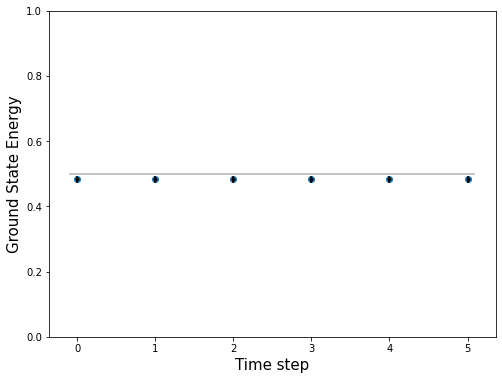

In [86]:
#Plotting
plt.scatter(timestep[:6], estimator[:6])
plt.hlines(0.5, -0.1, 5.1, alpha = 0.3)
plt.ylim(0, 1)

plt.xlabel("Time step", fontsize = '15')
plt.ylabel("Ground State Energy", fontsize = '15')
plt.errorbar(timestep[:6], estimator[:6], yerr= 1/np.sqrt(10000), fmt=".k")
plt.rcParams['figure.figsize']=[8, 6]
plt.show()

### First-Excited State Energy

In [87]:
# Computing the object of interest

def compute_G(x,n):
    g = 0
    for j in range (0, N):
        g = g + x[j]*x[(j+n)%N]          # with periodic boundary conditions
    return g/N
#===================================================

N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.5                                           # time step/Lattice spacing
N_corr =  20                                      # Correlation damping measure
N_cf = 10000                                       # Total Paths used

#===================================================

# Call Simulation

G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                 # the computed G for each path at
                                                 # each lattice point
        
timestep, estimator = MCaverage(G)               # Simulate

In [88]:
# Finding First Excited State Energy
E1 = []
for n in range(0, N-1):
    e1 = np.log(estimator[n]/estimator[n+1])/a + 0.5
    E1.append(e1)

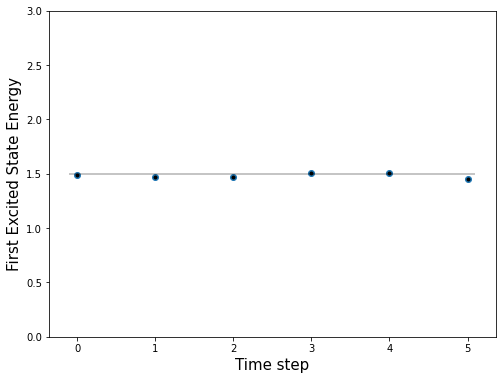

In [89]:
#Plotting
plt.scatter(timestep[:6], E1[:6])
plt.hlines(1.5, -0.1, 5.1, alpha = 0.3)
plt.ylim(0, 3)

plt.xlabel("Time step", fontsize = '15')
plt.ylabel("First Excited State Energy", fontsize = '15')
plt.errorbar(timestep[:6], E1[:6], yerr= 1/np.sqrt(10000), fmt=".k")
plt.show()

## Quartic-Anharmonic Oscillator

In [84]:
# Functions

# The quartic-anharmonic potential

def V(x, g): 
        return 0.5*(x**2) + g*(x**4)
    
# Compute local Action

def S(j, x):
    jp = (j+1)%N
    jm = (j-1)%N
    return a*V(x[j], g) + x[j]*(x[j]-x[jp]-x[jm])/a

# Perturbative solutions
def Purt_E(g, n, o):
    if o == 2:
        if n == 0:
            E = (0.5 + n) + g* 3/4 *(2*n**2 + 2*n + 1) - g**2 *(21/8)
        else:
            E = (0.5 + n) + g* 3/4 *(2*n**2 + 2*n + 1) + g**2 *(-15/2)
            
    else:
        E = (0.5 + n) + g* 3/4 *(2*n**2 + 2*n + 1)
    return E

### Ground State Energy

In [72]:
# Computing the object of interest

def compute_G(x,n):
    G = 0
    for j in range (0, N):
        G = G + x[j]**2  + 3*g*x[j]**4               
    return G/N

In [98]:
N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.4                                           # time step/Lattice spacing
N_corr = 20                                       # Correlation damping measure
N_cf = 5000                                       # Total Paths used

#=================================================

g = 0
Monte = []
param = []
while g < 0.21:
    G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                     # the computed G for each path at
                                                     # each lattice point

    timestep, estimator = MCaverage(G)               # Simulate
    
    print("Monte", np.mean(estimator))
    Monte.append(np.mean(estimator))
    
    #print("Perturbed", Purt_E(g, 0))
    #Purt.append(Purt_E(g, 0))
    
    param.append(g)
    print("Coupling", g)
    g += 0.04

Monte 0.4997034622225402
Coupling 0
Monte 0.5187756238416892
Coupling 0.04
Monte 0.5313185119684901
Coupling 0.08
Monte 0.5559578775952315
Coupling 0.12
Monte 0.5574526839025312
Coupling 0.16
Monte 0.5781736718562962
Coupling 0.2


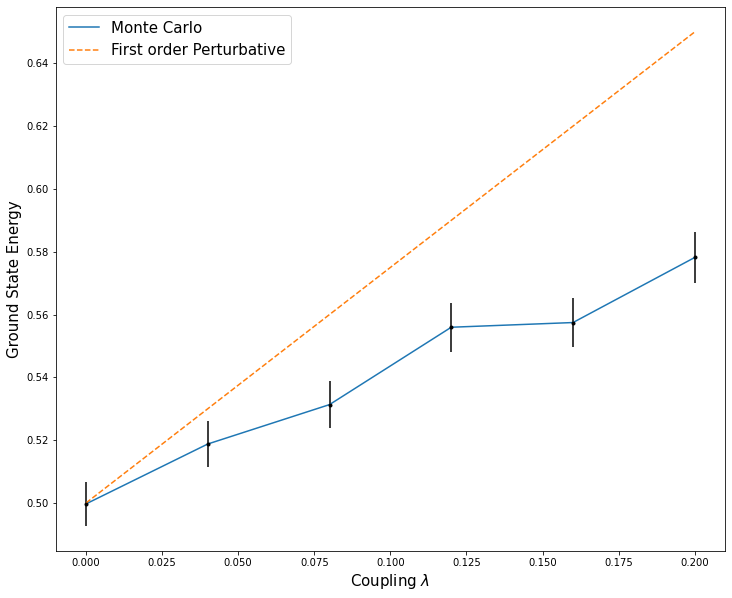

In [99]:
#Plotting: First order perturbative sol

x = np.linspace(0, 0.2, 100)
Purt = np.array([Purt_E(g, 0, 1) for g in x])

plt.plot(param, Monte, label = "Monte Carlo")
plt.plot(x, Purt,  "--", label = "First order Perturbative")

#plt.ylim(0, 0.8)
plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("Ground State Energy", fontsize = '15')
plt.legend(fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.show()

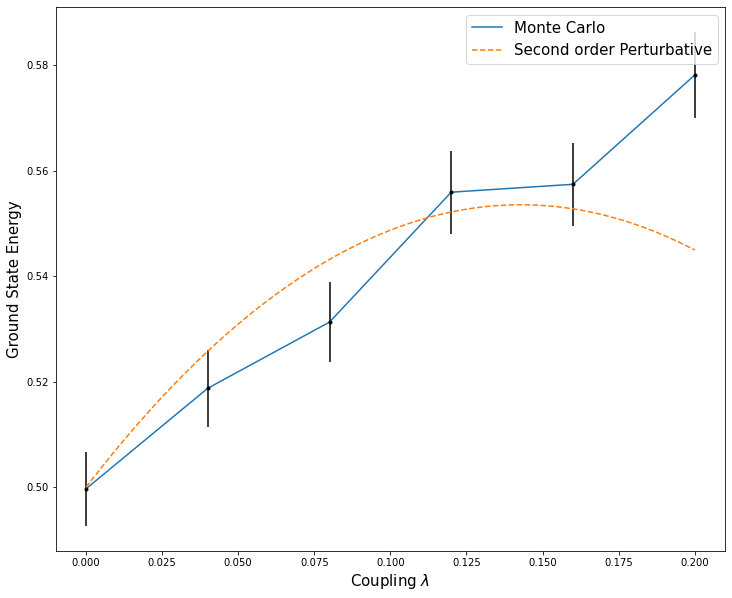

In [100]:
#Plotting: Second order perturbative sol

x = np.linspace(0, 0.2, 100)
Purt = np.array([Purt_E(g, 0, 2) for g in x])

plt.plot(param, Monte, label = "Monte Carlo")
plt.plot(x, Purt,  "--", label = "Second order Perturbative")

#plt.ylim(0, 0.8)
plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("Ground State Energy", fontsize = '15')
plt.legend(fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.show()

In [102]:
# Extention

#=================================================
N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.4                                           # time step/Lattice spacing
N_corr = 20                                       # Correlation damping measure
N_cf = 5000                                       # Total Paths used

#=================================================

g = 0
Monte = []
param = []
while g < 10:
    G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                     # the computed G for each path at
                                                     # each lattice point

    timestep, estimator = MCaverage(G)               # Simulate
    
    print("Monte", np.mean(estimator))
    Monte.append(np.mean(estimator))
    
    #print("Perturbed", Purt_E(g, 0))
    #Purt.append(Purt_E(g, 0))
    
    param.append(g)
    print("Coupling", g)
    g += 1.

Monte 0.4887875651247137
Coupling 0
Monte 0.7362006624516568
Coupling 1.0
Monte 0.8287860156492165
Coupling 2.0
Monte 0.8884648793375026
Coupling 3.0
Monte 0.9503735328809139
Coupling 4.0
Monte 0.9840903215375993
Coupling 5.0
Monte 1.0081678968222687
Coupling 6.0
Monte 1.044079507841046
Coupling 7.0
Monte 1.0637487007093516
Coupling 8.0
Monte 1.091545315536369
Coupling 9.0


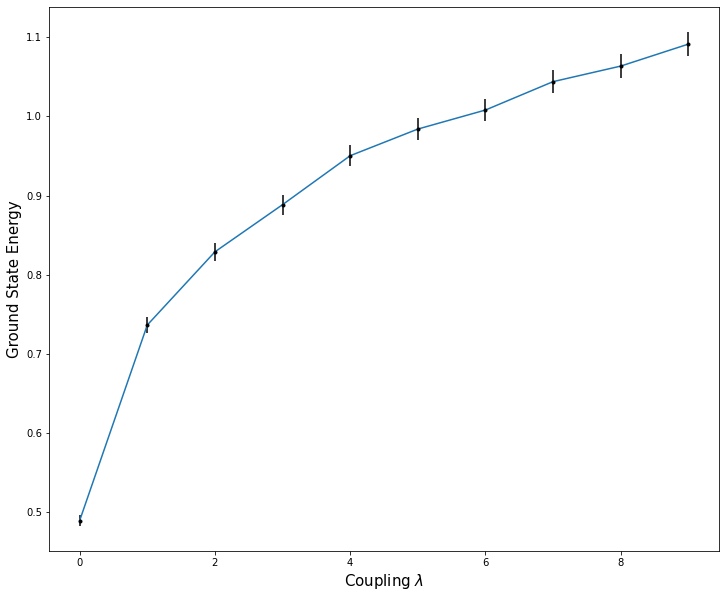

In [109]:
#Plotting: Extension

plt.plot(param, Monte, label = "Monte Carlo")


#plt.ylim(0, 0.8)
plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("Ground State Energy", fontsize = '15')
#plt.legend(fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.show()

### First Excited State Energy

In [110]:
# Computing the object of interest

def compute_G(x,n):
    g = 0
    for j in range (0, N):
        g = g + x[j]*x[(j+n)%N]          # with periodic boundary conditions
    return g/N

In [114]:

N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.5                                           # time step/Lattice spacing
N_corr =  20                                      # Correlation damping measure
N_cf = 5000                                        # Total Paths used

#=================================================

g = 0
Monte = []
#Purt = []
param = []
while g < 0.5:
    G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                     # the computed G for each path at
                                                     # each lattice point

    timestep, estimator = MCaverage(G)               # Simulate
    dE1 = []
    for n in range(0, N-1):
        de1 = np.log(estimator[n]/estimator[n+1])/a
        dE1.append(de1)
    
    print("Monte", dE1[1])
    Monte.append(dE1[1])
    
    #dP = (Purt_E(g, 1)-Purt_E(g, 0))
    #print("Perturbed", dP)
    #Purt.append(dP)
    
    param.append(g)
    g += 0.08
    

Monte 0.9950813564664801
Monte 1.1386561570926936
Monte 1.2645809286421772
Monte 1.3471354097635366
Monte 1.4493276685053385
Monte 1.4959711334905414
Monte 1.5408848319213906
-0.005059591001554509


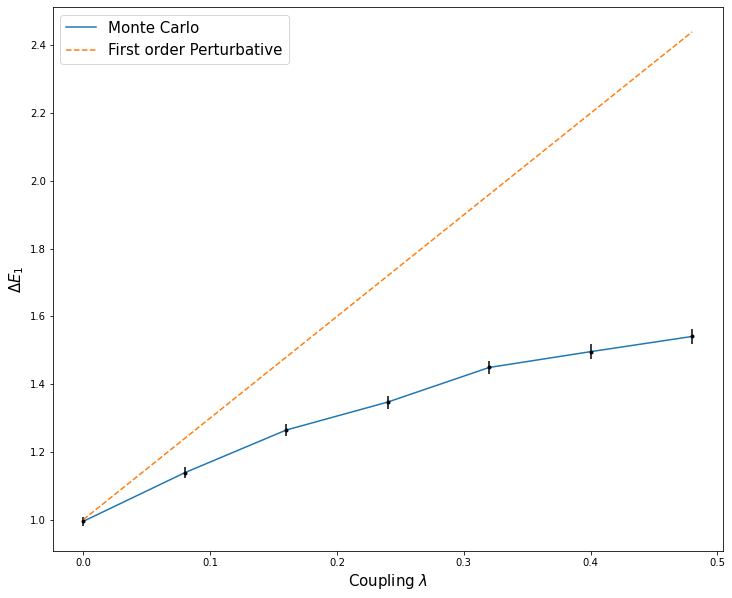

In [119]:
#Plotting: First order perturbative sol

x = np.linspace(0, 0.48, 100)
P0 = np.array([Purt_E(g, 0, 1) for g in x])
P1 = np.array([Purt_E(g, 1, 1) for g in x])
Purt = P1-P0

plt.plot(param, Monte, label = "Monte Carlo")
plt.plot(x, Purt,  "--", label = "First order Perturbative")

plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("$\Delta E_1$", fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.legend(fontsize = '15')
plt.show()

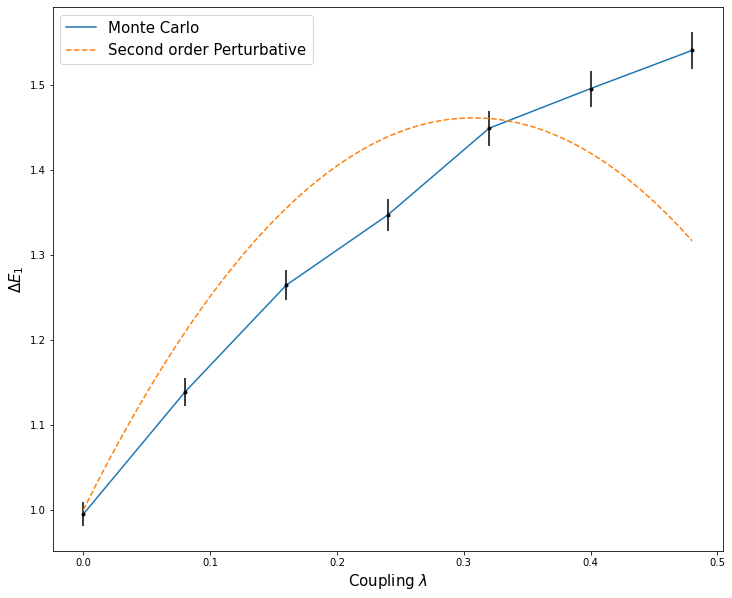

In [120]:
#Plotting: Second order perturbative sol

x = np.linspace(0, 0.48, 100)
P0 = np.array([Purt_E(g, 0, 2) for g in x])
P1 = np.array([Purt_E(g, 1, 2) for g in x])
Purt = P1-P0

plt.plot(param, Monte, label = "Monte Carlo")
plt.plot(x, Purt,  "--", label = "Second order Perturbative")

plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("$\Delta E_1$", fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.legend(fontsize = '15')
plt.show()

In [137]:
#Extention 
import time
start = time.time()
#=================================================
N = 20                                            # Duration of path/no. of 
                                                  # Lattice points
eps = 1.4                                         # variation in paths 
a = 0.5                                           # time step/Lattice spacing
N_corr =  20                                      # Correlation damping measure
N_cf = 5000                                        # Total Paths used

#=================================================

g = 0
Monte = []
#Purt = []
param = []
while g < 2:
    G = np.zeros((N_cf, N))                          # Matrix to store all values of
                                                     # the computed G for each path at
                                                     # each lattice point

    timestep, estimator = MCaverage(G)               # Simulate
    dE1 = []
    for n in range(0, N-1):
        de1 = np.log(estimator[n]/estimator[n+1])/a
        dE1.append(de1)
    
    print("Monte", dE1[1])
    Monte.append(dE1[1])
    
    #dP = (Purt_E(g, 1)-Purt_E(g, 0))
    #print("Perturbed", dP)
    #Purt.append(dP)
    
    param.append(g)
    g += 1.
    
elapsed = (time.time() - start)
print(elapsed)

Monte 0.9901264823660794
Monte 1.8326419270042609
64.93200588226318


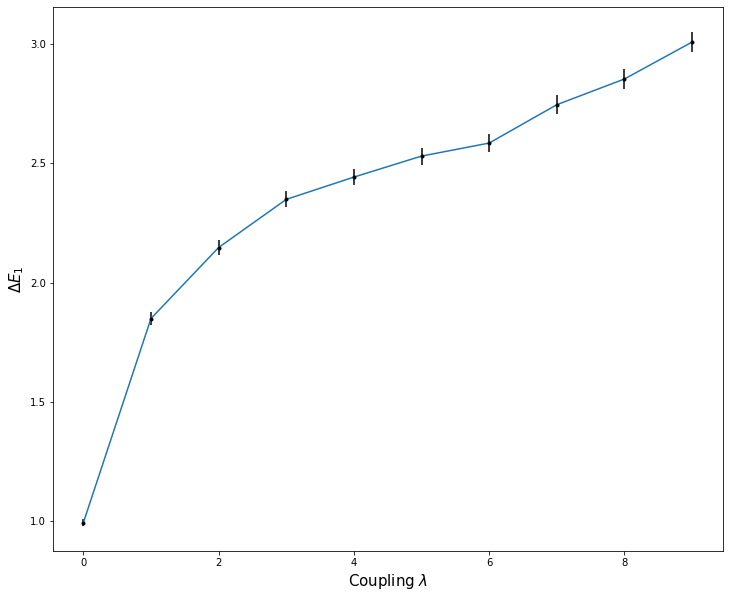

In [129]:
# Plotting: Extention

plt.plot(param, Monte, label = "Monte Carlo")

plt.xlabel("Coupling $\lambda$", fontsize = '15')
plt.ylabel("$\Delta E_1$", fontsize = '15')

plt.errorbar(param, Monte, yerr= Monte/np.sqrt(N_cf), fmt=".k")

plt.show()

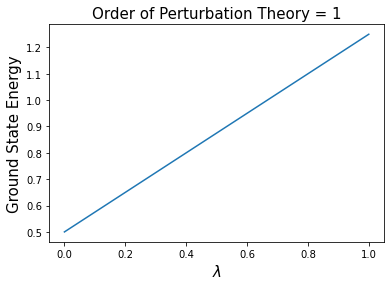

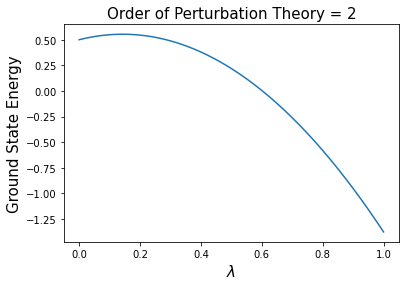

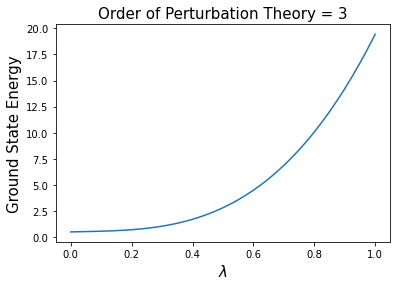

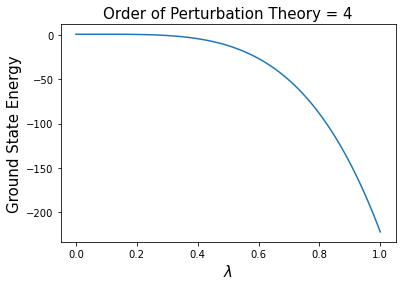

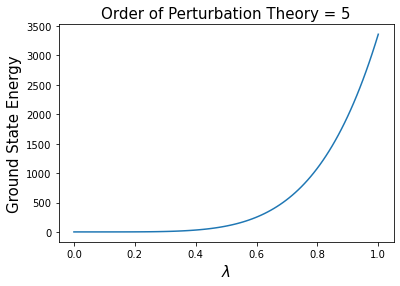

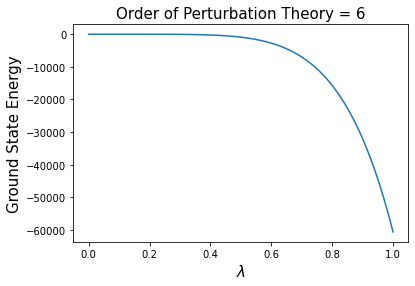

In [95]:
# The full ground state pertubative expansion

plt.rcParams['figure.figsize']=[6, 4]

x = np.linspace(0, 1, 100)
def E(x, o):
    if o == 1:
        E = 1/2 * (1 + (3/2)*x)
    elif o == 2:
        E = 1/2 * (1 + (3/2)*x - (21/4)*x**2 )
    elif o == 3:
        E = 1/2 * (1 + (3/2)*x - (21/4)*x**2 + (333/8)*x**3 )
    elif o == 4:
        E = 1/2 * (1 + (3/2)*x - (21/4)*x**2 + (333/8)*x**3 - (30885/64)*x**4 )
    elif o == 5:
        E = 1/2 * (1 + (3/2)*x - (21/4)*x**2 + (333/8)*x**3 - (30885/64)*x**4 + (916731/128)*x**5)
    else:
        E = 1/2 * (1 + (3/2)*x - (21/4)*x**2 + (333/8)*x**3 - (30885/64)*x**4 + (916731/128)*x**5 - (65518401/512)*x**6)
    return E  
        
        
for i in range(6):
    e = E(x, i+1)
    plt.plot(x, e)
    plt.xlabel("$\lambda$", fontsize = '15')
    plt.ylabel("Ground State Energy", fontsize = '15')
    plt.title("Order of Perturbation Theory = " + f'{i+1}', fontsize = '15')
    plt.show()
